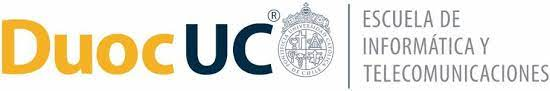



Nombre Estudiante:

* Cristián Jeldres
* Lorena Reyes
* Maximiliano  Valdés

Docente:  Carlos Correa   

Sección: DLY0200 -

Importaremos las librerias necesarias para nuestro trabajo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import requests
import gzip
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D, AveragePooling2D,MaxPooling2D,  Add,Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import FalsePositives, AUC,MeanIoU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2


# **Fase 1: Entendimiento del negocio**

En esta primera fase, nos enfocaremos en comprender los aspectos clave relacionados con la clasificacion de imagenes de moda utilizando el conjunto de datos Fashion-MNIST que consta de imagenes en escala de grises de 28 x 28 de 70.000 productos de moda de 10 categorias, con 7000 imágenes por categoría. Nuestro conjunto de entrenamiento consta de 60.000 imagenes y el conjunto de prueba tiene 10.000 imágenes. Para desarrollar este proyecto trabajaremos bajo la metodología de CRISP-DM la cual consta con 6 fases:

* Entendimiento del negocio
* Entendimiento de los datos
* Preparacion de los datos
* Modelado
* Evaluacion del modelo
* Despliegue

Esta metodología garantizará un enfoque sistemático y efectivo en todas las etapas del proyecto.

**Objetivos del negocio:**

El propósito general de este proyecto es poder mejorar la clasificación de las imágenes de moda del comercio electrónico.
Se busca resolver el desafío de categorizar correctamente productos de moda en 10 categorias distintas.

**Criterios de éxito del negocio:**

Mediremos el éxito del modelo mediante métricas como la precisión de la clasificacíon con el objetivo de lograr una alta precisíon en la clasificacion de las imagenes.

# **Fase 2: Entendimiento de los datos**

El conjunto de datos Fashion-MNIST que consta de imagenes en escala de grises de 28 x 28 de 70.000 productos de moda de 10 categorias, con 7000 imágenes por categoría

In [ ]:

# Conjunto de Prueba

def load_fashion_mnist_online():
    """Carga el conjunto de datos Fashion-MNIST desde la web."""
    labels_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'
    images_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'

    # Descargar los archivos comprimidos de las etiquetas e imágenes
    labels_response = requests.get(labels_url)
    images_response = requests.get(images_url)

    # Descomprimir los archivos y leer los datos
    labels = np.frombuffer(gzip.decompress(labels_response.content), dtype=np.uint8, offset=8)
    images = np.frombuffer(gzip.decompress(images_response.content), dtype=np.uint8, offset=16).reshape(len(labels), 28, 28)

    return images, labels

# Cargar el conjunto de datos Fashion-MNIST desde la web
x_train, y_train = load_fashion_mnist_online()

In [ ]:
# Datos de prueba
def load_fashion_mnist_test():
    """Carga solo los datos de prueba del conjunto de datos Fashion-MNIST desde la web."""
    test_labels_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'
    test_images_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'

    # Descargar los archivos comprimidos de las etiquetas e imágenes de prueba
    test_labels_response = requests.get(test_labels_url)
    test_images_response = requests.get(test_images_url)

    # Descomprimir los archivos y leer los datos de prueba
    test_labels = np.frombuffer(gzip.decompress(test_labels_response.content), dtype=np.uint8, offset=8)
    test_images = np.frombuffer(gzip.decompress(test_images_response.content), dtype=np.uint8, offset=16).reshape(len(test_labels), 28, 28)

    return test_images, test_labels
#
# Cargar solo los datos de prueba del conjunto de datos Fashion-MNIST desde la web
x_test, y_test = load_fashion_mnist_test()


In [ ]:
print ("Conjunto de entrenamiento")
print(x_train.shape)
print(y_train.shape)
print(" ")
print ("Conjunto de prueba")
print(x_test.shape)
print(y_test.shape)


Conjunto de entrenamiento
(60000, 28, 28)
(60000,)
 
Conjunto de prueba
(10000, 28, 28)
(10000,)


Le asignamos un nombre a las categorias para un mejor entendimiento

In [ ]:
category_names = {
    0: "Camiseta",
    1: "Pantalón",
    2: "Jersey",
    3: "Vestido",
    4: "Abrigo",
    5: "Sandalia",
    6: "Camisa",
    7: "Zapatilla",
    8: "Bolso",
    9: "Bota de tobillo"
 }

In [ ]:
# Preprocesamiento de datos
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Vizualizamos algunas de las imagenes del conjunto de muestra**

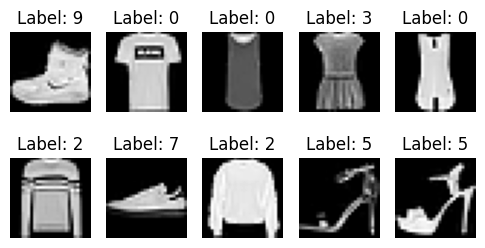

In [ ]:
def plot_sample_images(images, labels, num_samples=10):
    plt.figure(figsize=(6, 3))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape((28, 28)), cmap='gray')
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.show()

# Visualizar imágenes de muestra
plot_sample_images(x_train, y_train)



**Visualizar la distribución de las etiquetas en el conjunto de entrenamiento**

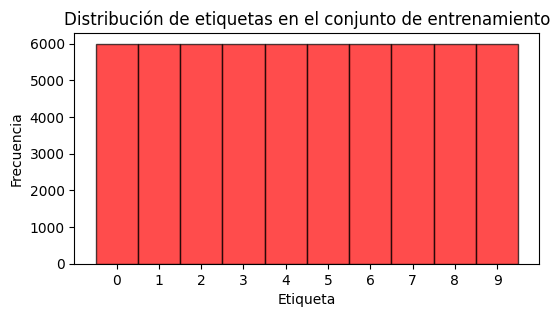

In [ ]:
def plot_label_distribution(category_names, color='red'):
    plt.figure(figsize=(6, 3))
    plt.hist(np.argmax(category_names, axis=1), bins=np.arange(11)-0.5, edgecolor='black', color=color, alpha=0.7)
    plt.xticks(range(10))
    plt.title('Distribución de etiquetas en el conjunto de entrenamiento')
    plt.xlabel('Etiqueta')
    plt.ylabel('Frecuencia')
    plt.show()

plot_label_distribution(y_train)


# **Fase 3: Preparacion de los datos**

Dividimos los datos en entrenamiento y prueba pero separamos en base al estandar de la industria 80/20 ya que el conjunto venia separado en 90/10

In [ ]:
# Combinar datos
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)
x_train, x_test, y_train, y_test = train_test_split(x_combined, y_combined,  test_size=0.2, random_state=42)


**Normalizacion y aumento de datos**

La clase ImageDataGenerator se configura con distintos parametros para realizar la normalizacion y aumentar la variabilidad de los datos de el conjunto de entrenamiento

In [ ]:
# Normalización y aumento de datos
datagen = ImageDataGenerator(
    rotation_range=10,  # Rango de rotación en grados
    width_shift_range=0,  # Rango de desplazamiento horizontal
    height_shift_range=0,  # Rango de desplazamiento vertical
    horizontal_flip=True,  # No aplicar volteo horizontal
    vertical_flip=False  # No aplicar volteo vertical
)

# Ajustar el generador de datos al conjunto de entrenamiento
datagen.fit(x_train)

# Crear generador de datos aumentados
augmented_data_generator = datagen.flow(x_train, y_train, batch_size=64)

#**Fase 4: Modelamiento**

**Red Feed Fordward fully-connected (MLP)**

In [ ]:
redsin = Sequential()
redsin.add(Flatten(input_shape=(28,28,1)))
redsin.add(Dense(64, activation='relu', name='primera_capa'))
redsin.add(Dense(32, activation='relu', name='segunda_capa'))
redsin.add(Dense(16, activation='relu', name='tercer_capa'))
redsin.add(Dense(10, activation='softmax', name='capa_de_output'))

# Ahora compilamos la red para poder entrenar (con .compile)
redsin.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','AUC']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Entrenamos simplemente haciendo .fit y entregando los inputs
rsin = redsin.fit(augmented_data_generator,
        epochs=20,
        batch_size=64,
        steps_per_epoch=len(x_train) // 64,
        validation_data=(x_test,y_test),
        callbacks=[early_stopping]
       )

Epoch 1/20
875/875 [==============================] - 27s 23ms/step - loss: 1.2017 - accuracy: 0.5772 - auc: 0.9248 - val_loss: 0.8704 - val_accuracy: 0.6714 - val_auc: 0.9578
Epoch 2/20
875/875 [==============================] - 17s 19ms/step - loss: 0.7566 - accuracy: 0.7263 - auc: 0.9682 - val_loss: 0.6829 - val_accuracy: 0.7554 - val_auc: 0.9738
Epoch 3/20
875/875 [==============================] - 17s 19ms/step - loss: 0.6584 - accuracy: 0.7670 - auc: 0.9753 - val_loss: 0.6087 - val_accuracy: 0.7856 - val_auc: 0.9784
Epoch 4/20
875/875 [==============================] - 19s 21ms/step - loss: 0.6035 - accuracy: 0.7862 - auc: 0.9787 - val_loss: 0.5619 - val_accuracy: 0.8064 - val_auc: 0.9813
Epoch 5/20
875/875 [==============================] - 17s 19ms/step - loss: 0.5712 - accuracy: 0.7989 - auc: 0.9807 - val_loss: 0.5552 - val_accuracy: 0.8014 - val_auc: 0.9815
Epoch 6/20
875/875 [==============================] - 17s 19ms/step - loss: 0.5481 - accuracy: 0.8063 - auc: 0.9819 - va

* Se esta entrenando durante 20 epocas. En capa epoca vemos la perdida (loss), la precision (Acurracy) y el area de la curva ROC (AUC)

* la perdida y la precision mejoran a lo largo de las epocas, lo que nos dice que el modelo si esta aprendiendo de los datos y mejorando el rendimiento.


In [ ]:
print("Feed foward fully-connected con funcion de activacion Relu y optimizador SGD y funcion de perdida categorical_crossentropy")
redsin.evaluate(x_test,y_test)


Feed foward fully-connected con funcion de activacion Relu y optimizador SGD y funcion de perdida categorical_crossentropy
438/438 [==============================] - 2s 4ms/step - loss: 0.4225 - accuracy: 0.8529 - auc: 0.9883


[0.4224998354911804, 0.8528571724891663, 0.9883338212966919]

* se evalua el modelo en el conjunto de datos de prueba
* podemos ver las perdidas, la precision y el area bajo la curva ROC
* podemos ver como el modelo generaliza a datos desconocidos y podemos evaluar el rendimiento real.



Resultados obtenidos con MLP:


**N° Capas:** 4

**N° Neuronas por capa:** 64 primera capa, 32 segunda capa, 16 tercera capa, 10 capa de salida

**N° Épocas:** 20

**Regularizador:**

**Optimizador:**SGD

---

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.1. Mejor resultado con MLP }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador} & \text { Función de salida } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 4 capas } & \text{20 épocas} & \text{64} & \text{-} & \text{SGD} & \text{Softmax} & \text{0.8509} & \text{0.4262 }\\
\hline
\end{array}
\end{aligned}
$$

# **Redes Convolucionales**

**Arquitectura**

**Batch Normalization:** Normalización por lotes después de cada capa convolutiva y después de la capa completamente conectada.

**AVGPool2D:** Agrupación promedio con ventana de (2x2) después de cada capa convolutiva.

**MaxPool2D:** Agrupación maxima con ventana de (2x2) después de cada capa convolutiva.

**Dropout:** Capa de abandono con tasa definida después de cada capa convolutiva y después de la capa completamente conectada.

**Capa Flatten:** Transforma la salida de las capas convolutivas a un vector plano.

**Capas Completamente Conectadas:** Dense_1: 128 neuronas con activación definida por el parámetro.

**Capa de Salida:** Capa de salida softmax con 10 neuronas para la clasificación de 10 clases.

**Compilación del Modelo:**

Función de Pérdida: Categorical Crossentropy.
Optimizador: Especificado por el parámetro.
Métricas: Accuracy, False Positives, AUC.

### **Primer Modelo**


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model_principal = Sequential()

model_principal.add(Conv2D(32, kernel_size=(3,3), strides=(1, 1), input_shape=(28,28,1), activation="relu", padding="same", name="convolution_1"))
model_principal.add(BatchNormalization(name='batch_normalization_1'))
model_principal.add(AveragePooling2D(pool_size=(2, 2), name='pooling_1'))
model_principal.add(Dropout(0.3, name='dropout_1'))

model_principal.add(Conv2D(64, kernel_size=(3,3), strides=(1, 1), activation="relu", padding="same", name="convolution_2"))
model_principal.add(BatchNormalization(name='batch_normalization_2'))
model_principal.add(AveragePooling2D(pool_size=(2, 2), name='pooling_2'))
model_principal.add(Dropout(0.3, name='dropout_2'))

model_principal.add(Conv2D(64, kernel_size=(3,3), strides=(1, 1),activation="relu", padding="same", name="convolution_3"))
model_principal.add(BatchNormalization(name='batch_normalization_3'))
model_principal.add(Dropout(0.3, name='dropout_3'))

model_principal.add(Flatten(name='flatten'))
model_principal.add(Dense(64, name='dense_1', activation="relu"))
model_principal.add(Dropout(0.3, name='dropout_4'))

model_principal.add(Dense(10, activation='softmax', name='output'))

model_principal.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy', FalsePositives(), AUC(), MeanIoU(num_classes=10)])

### **Convinaciones**

In [ ]:
def build_model(KernelSize, Pooling):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    np.random.seed(42)

    model = Sequential()

    model.add(Conv2D(32, kernel_size=KernelSize, strides=(1, 1), input_shape=(28,28,1), activation="relu", padding="same", name="convolution_1"))
    model.add(BatchNormalization(name='batch_normalization_1'))
    model.add(Pooling(pool_size=(2, 2), name='pooling_1'))
    model.add(Dropout(0.3, name='dropout_1'))

    model.add(Conv2D(64, kernel_size=KernelSize, strides=(1, 1), activation="relu", padding="same", name="convolution_2"))
    model.add(BatchNormalization(name='batch_normalization_2'))
    model.add(Pooling(pool_size=(2, 2), name='pooling_2'))
    model.add(Dropout(0.3, name='dropout_2'))

    model.add(Conv2D(64, kernel_size=KernelSize, strides=(1, 1),activation="relu", padding="same", name="convolution_3"))
    model.add(Pooling(name='batch_normalization_3'))
    model.add(Dropout(0.3, name='dropout_3'))

    model.add(Flatten(name='flatten'))
    model.add(Dense(64, name='dense_1', activation="relu"))
    model.add(Dropout(0.3, name='dropout_4'))

    model.add(Dense(10, activation='softmax', name='output'))

    model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy', FalsePositives(), AUC(),MeanIoU(num_classes=10)])

    return model


**Ultimo modelo**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model_ultimo = Sequential()

model_ultimo.add(Conv2D(32, kernel_size=(3,3), strides=(1, 1), input_shape=(28,28,1), activation="relu", padding="same", name="convolution_1"))
model_ultimo.add(BatchNormalization(name='batch_normalization_1'))
model_ultimo.add(AveragePooling2D(pool_size=(2, 2), name='pooling_1'))
model_ultimo.add(Dropout(0.3, name='dropout_1'))

model_ultimo.add(Conv2D(64, kernel_size=(3,3), strides=(1, 1), activation="relu", padding="same", name="convolution_2"))
model_ultimo.add(BatchNormalization(name='batch_normalization_2'))
model_ultimo.add(AveragePooling2D(pool_size=(2, 2), name='pooling_2'))
model_ultimo.add(Dropout(0.3, name='dropout_2'))

model_ultimo.add(Conv2D(128, kernel_size=(3,3), strides=(1, 1),activation="relu", padding="same", name="convolution_3"))
model_ultimo.add(BatchNormalization(name='batch_normalization_3'))
model_ultimo.add(Dropout(0.3, name='dropout_3'))

model_ultimo.add(Flatten(name='flatten'))
model_ultimo.add(Dense(128, name='dense_1', activation="relu"))
model_ultimo.add(Dropout(0.3, name='dropout_4'))

model_ultimo.add(Dense(10, activation='softmax', name='output'))

model_ultimo.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy', FalsePositives(), AUC(), MeanIoU(num_classes=10)])


**Accuracy:** Representa la proporción de ejemplos clasificados correctamente. Es una métrica frecuentemente utilizada en problemas de clasificación.

**False Positives (Falsos Positivos):** Indica la cantidad de instancias que fueron clasificadas erróneamente como positivas cuando en realidad eran negativas. Es especialmente útil en contextos donde es crucial minimizar los falsos positivos.

**AUC (Área bajo la Curva ROC):** Evalúa la capacidad del modelo para diferenciar entre clases. Un valor de 1 representa un rendimiento perfecto, mientras que un valor de 0.5 sugiere un rendimiento equivalente al azar.

**Mean IoU (Intersección sobre Unión Promedio):** Es una métrica esencial en problemas de segmentación de imágenes. Calcula la intersección sobre la unión para cada clase y toma el promedio. Un valor cercano a 1 indica una mayor superposición entre las predicciones del modelo y las ubicaciones verdaderas de las clases.

##**Early Stopping**

Se ha implementado una estrategia de detención temprana (EarlyStopping) para evitar el sobreajuste durante el entrenamiento de los modelos. Los parámetros utilizados son los siguientes:

* **Monitor de Pérdida:** 'val_loss'
* **Paciencia:** 3 (número de épocas sin mejora antes de detener el entrenamiento)
* **Restaurar Mejores Pesos:** Sí (restaurar los pesos del modelo a la mejor época)

Esta estrategia contribuye a mejorar la capacidad de generalización del modelo al detener el entrenamiento cuando la pérdida en el conjunto de validación deja de disminuir, evitando así el sobreajuste.

In [ ]:
# Early Stopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

**Entrenar los modelos**

In [ ]:
model_relu_adam2 = build_model((7,7),AveragePooling2D)
model_relu_adam3 = build_model((3,3),MaxPooling2D )
model_relu_adam4 = build_model((7,7),MaxPooling2D )

###Resultados

**Modelo para la primera convinacion**

In [ ]:
history_1 = model_principal.fit(augmented_data_generator, batch_size=64, epochs=20, validation_data=(x_test,y_test), callbacks=[early_stopping],verbose=2)

Epoch 1/20
875/875 - 26s - loss: 0.6488 - accuracy: 0.7662 - false_positives: 7760.0000 - auc: 0.9748 - mean_io_u: 0.4607 - val_loss: 0.3796 - val_accuracy: 0.8583 - val_false_positives: 1469.0000 - val_auc: 0.9907 - val_mean_io_u: 0.4842 - 26s/epoch - 30ms/step
Epoch 2/20
875/875 - 18s - loss: 0.4640 - accuracy: 0.8299 - false_positives: 6415.0000 - auc: 0.9863 - mean_io_u: 0.4748 - val_loss: 0.3527 - val_accuracy: 0.8634 - val_false_positives: 1504.0000 - val_auc: 0.9915 - val_mean_io_u: 0.5111 - 18s/epoch - 20ms/step
Epoch 3/20
875/875 - 18s - loss: 0.4145 - accuracy: 0.8467 - false_positives: 5966.0000 - auc: 0.9888 - mean_io_u: 0.4791 - val_loss: 0.3120 - val_accuracy: 0.8850 - val_false_positives: 1293.0000 - val_auc: 0.9932 - val_mean_io_u: 0.5005 - 18s/epoch - 21ms/step
Epoch 4/20
875/875 - 18s - loss: 0.3821 - accuracy: 0.8608 - false_positives: 5597.0000 - auc: 0.9901 - mean_io_u: 0.4843 - val_loss: 0.2836 - val_accuracy: 0.8976 - val_false_positives: 1157.0000 - val_auc: 0.9

**Convinacion 1 del modelo elegido**

In [ ]:
history_2 = model_relu_adam2.fit(augmented_data_generator, batch_size=64, epochs=20, validation_data=(x_test,y_test), callbacks=[early_stopping],verbose=2)

Epoch 1/20
875/875 - 24s - loss: 0.6271 - accuracy: 0.7692 - false_positives: 7505.0000 - auc: 0.9767 - mean_io_u: 0.4562 - val_loss: 0.4280 - val_accuracy: 0.8436 - val_false_positives: 1641.0000 - val_auc: 0.9878 - val_mean_io_u: 0.4602 - 24s/epoch - 27ms/step
Epoch 2/20
875/875 - 19s - loss: 0.4386 - accuracy: 0.8402 - false_positives: 6133.0000 - auc: 0.9877 - mean_io_u: 0.4630 - val_loss: 0.3745 - val_accuracy: 0.8652 - val_false_positives: 1339.0000 - val_auc: 0.9907 - val_mean_io_u: 0.4771 - 19s/epoch - 21ms/step
Epoch 3/20
875/875 - 20s - loss: 0.3893 - accuracy: 0.8586 - false_positives: 5665.0000 - auc: 0.9900 - mean_io_u: 0.4700 - val_loss: 0.3078 - val_accuracy: 0.8850 - val_false_positives: 1203.0000 - val_auc: 0.9935 - val_mean_io_u: 0.4775 - 20s/epoch - 22ms/step
Epoch 4/20
875/875 - 18s - loss: 0.3621 - accuracy: 0.8679 - false_positives: 5359.0000 - auc: 0.9912 - mean_io_u: 0.4784 - val_loss: 0.2964 - val_accuracy: 0.8909 - val_false_positives: 1147.0000 - val_auc: 0.9

**Convinacion 2 del modelo elegido**

In [ ]:
history_3 = model_relu_adam3.fit(augmented_data_generator, batch_size=64, epochs=20, validation_data=(x_test,y_test), callbacks=[early_stopping],verbose=2)

Epoch 1/20
875/875 - 21s - loss: 0.8759 - accuracy: 0.6838 - false_positives: 8211.0000 - auc: 0.9561 - mean_io_u: 0.4508 - val_loss: 0.4381 - val_accuracy: 0.8348 - val_false_positives: 1683.0000 - val_auc: 0.9877 - val_mean_io_u: 0.4500 - 21s/epoch - 24ms/step
Epoch 2/20
875/875 - 19s - loss: 0.5429 - accuracy: 0.7994 - false_positives: 7014.0000 - auc: 0.9820 - mean_io_u: 0.4583 - val_loss: 0.4309 - val_accuracy: 0.8356 - val_false_positives: 1749.0000 - val_auc: 0.9879 - val_mean_io_u: 0.4799 - 19s/epoch - 22ms/step
Epoch 3/20
875/875 - 18s - loss: 0.4763 - accuracy: 0.8246 - false_positives: 6400.0000 - auc: 0.9857 - mean_io_u: 0.4660 - val_loss: 0.3388 - val_accuracy: 0.8744 - val_false_positives: 1361.0000 - val_auc: 0.9919 - val_mean_io_u: 0.4934 - 18s/epoch - 21ms/step
Epoch 4/20
875/875 - 20s - loss: 0.4399 - accuracy: 0.8380 - false_positives: 6161.0000 - auc: 0.9876 - mean_io_u: 0.4749 - val_loss: 0.3160 - val_accuracy: 0.8810 - val_false_positives: 1191.0000 - val_auc: 0.9

**Convinacion 3 del modelo elegido**

In [ ]:
history_4 = model_relu_adam4.fit(augmented_data_generator, batch_size=64, epochs=20, validation_data=(x_test,y_test), callbacks=[early_stopping],verbose=2)


Epoch 1/20
875/875 - 23s - loss: 0.6922 - accuracy: 0.7519 - false_positives: 7613.0000 - auc: 0.9717 - mean_io_u: 0.4605 - val_loss: 0.3881 - val_accuracy: 0.8562 - val_false_positives: 1516.0000 - val_auc: 0.9901 - val_mean_io_u: 0.4779 - 23s/epoch - 26ms/step
Epoch 2/20
875/875 - 20s - loss: 0.4629 - accuracy: 0.8322 - false_positives: 6295.0000 - auc: 0.9863 - mean_io_u: 0.4736 - val_loss: 0.3595 - val_accuracy: 0.8659 - val_false_positives: 1386.0000 - val_auc: 0.9910 - val_mean_io_u: 0.4965 - 20s/epoch - 23ms/step
Epoch 3/20
875/875 - 19s - loss: 0.4141 - accuracy: 0.8489 - false_positives: 5892.0000 - auc: 0.9887 - mean_io_u: 0.4850 - val_loss: 0.3250 - val_accuracy: 0.8779 - val_false_positives: 1236.0000 - val_auc: 0.9930 - val_mean_io_u: 0.5089 - 19s/epoch - 22ms/step
Epoch 4/20
875/875 - 19s - loss: 0.3899 - accuracy: 0.8574 - false_positives: 5522.0000 - auc: 0.9897 - mean_io_u: 0.4982 - val_loss: 0.3349 - val_accuracy: 0.8788 - val_false_positives: 1332.0000 - val_auc: 0.9

**Convinacion 4 del modelo elegido**

In [ ]:
history_5 = model_ultimo.fit(augmented_data_generator, batch_size=64, epochs=20, validation_data=(x_test,y_test), callbacks=[early_stopping],verbose=2)

Epoch 1/20
875/875 - 22s - loss: 0.6343 - accuracy: 0.7701 - false_positives_1: 7588.0000 - auc_1: 0.9757 - mean_io_u_1: 0.4674 - val_loss: 0.4319 - val_accuracy: 0.8446 - val_false_positives_1: 1675.0000 - val_auc_1: 0.9876 - val_mean_io_u_1: 0.5156 - 22s/epoch - 25ms/step
Epoch 2/20
875/875 - 19s - loss: 0.4576 - accuracy: 0.8323 - false_positives_1: 6176.0000 - auc_1: 0.9864 - mean_io_u_1: 0.4853 - val_loss: 0.3514 - val_accuracy: 0.8701 - val_false_positives_1: 1327.0000 - val_auc_1: 0.9917 - val_mean_io_u_1: 0.5003 - 19s/epoch - 22ms/step
Epoch 3/20
875/875 - 18s - loss: 0.4047 - accuracy: 0.8527 - false_positives_1: 5711.0000 - auc_1: 0.9889 - mean_io_u_1: 0.4930 - val_loss: 0.3300 - val_accuracy: 0.8769 - val_false_positives_1: 1399.0000 - val_auc_1: 0.9922 - val_mean_io_u_1: 0.5303 - 18s/epoch - 21ms/step
Epoch 4/20
875/875 - 19s - loss: 0.3746 - accuracy: 0.8634 - false_positives_1: 5454.0000 - auc_1: 0.9904 - mean_io_u_1: 0.5056 - val_loss: 0.2993 - val_accuracy: 0.8902 - val

**Metricas del conjunto de pruebas**

In [ ]:
results_redsin = redsin.evaluate(x_test, y_test, verbose=0)
results_model_principal = model_principal.evaluate(x_test, y_test, verbose=0)
results_model_relu_adam2 = model_relu_adam2.evaluate(x_test, y_test, verbose=0)
results_model_relu_adam3 = model_relu_adam3.evaluate(x_test, y_test, verbose=0)
results_model_relu_adam4 = model_relu_adam4.evaluate(x_test, y_test, verbose=0)
results_model_ultimo = model_ultimo.evaluate(x_test, y_test, verbose=0)

print(f"Red Fully Connected: Loss - {results_redsin[0]:.4f}, Accuracy - {results_redsin[1]:.4f}")
print(f"Modelo para la primera convinacion: Loss - {results_model_principal[0]:.4f}, Accuracy - {results_model_principal[1]:.4f}")
print(f"Convinacion 1 del modelo elegido: Loss - {results_model_relu_adam2[0]:.4f}, Accuracy - {results_model_relu_adam2[1]:.4f}")
print(f"Convinacion 2 del modelo elegido: Loss - {results_model_relu_adam3[0]:.4f}, Accuracy - {results_model_relu_adam3[1]:.4f}")
print(f"Convinacion 3 del modelo elegido: Loss - {results_model_relu_adam4[0]:.4f}, Accuracy - {results_model_relu_adam4[1]:.4f}")
print(f"Convinacion 4 del modelo elegido: Loss - {results_model_ultimo[0]:.4f}, Accuracy - {results_model_ultimo[1]:.4f}")

Red Fully Connected: Loss - 0.4225, Accuracy - 0.8529
Modelo para la primera convinacion: Loss - 0.2244, Accuracy - 0.9170
Convinacion 1 del modelo elegido: Loss - 0.2418, Accuracy - 0.9112
Convinacion 2 del modelo elegido: Loss - 0.2603, Accuracy - 0.9061
Convinacion 3 del modelo elegido: Loss - 0.2370, Accuracy - 0.9130
Convinacion 4 del modelo elegido: Loss - 0.2324, Accuracy - 0.9156


## Mejor fully-connected

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.1. Mejor resultado con MLP }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador} & \text { Función de salida } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 4 capas } & \text{20 épocas} & \text{64} & \text{-} & \text{SGD} & \text{Softmax} & \text{0.8509} & \text{0.4262 }\\
\hline
\end{array}
\end{aligned}
$$

## **Modelo Elegido:**

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.2. Primer resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text {} & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Activacion } & \ \\
\hline \text{  } & \text { neuronas por capa} & \text{20 épocas} & \text{} & \text{3.3} & \text{"same"} & \text{2.2} & \text{1.1} & \text{Oculta = Relu / Salida = softmax} & \text{}\\
\hline
\end{array}
\end{aligned}
$$


$$
\begin{aligned}
& \hspace{100mm} \text { Comparando Resultados }\\
&\begin{array}{cccc}
\hline \hline \text { } & \text { } & \text { SGD } & \text { ADAM } & \text { RMsProp } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm} \text { val_loss } & \text { val_acc }\hspace{10mm} \text{ val_loss } & \text { val_acc }\hspace{10mm} \text { val_loss }\\
\hline \text{3 Capas Convolucionales 32/64/64} & \text { 20 epocas}
\\
\hline \text{2 Capas Densas 64/10(salida)} & \text{Con DropOut}
 & \text { 0.8508  }\hspace{10mm} \text { 0.2279 } & \text {0.9174}\hspace{10mm} \text{ 0.2294 } & \text {0.9169}\hspace{10mm} \text { 0.2323} \\
\hline \text{2 Capas AveragePooling2D(2,2)} & \text{Sin DropOut}
 & \text { 0.9127 }\hspace{10mm} \text { 0.2350 } & \text { 0.9163  }\hspace{10mm} \text{ 0.2302  } & \text { 0.9156  }\hspace{10mm} \text { 0.2673 }\\
\hline
\end{array}
\end{aligned}
$$

Luego de hacer estas 3 combinaciones, nos quedamos con la combinacion de ReLU y Adam, de las cuales se sacaran mas combinaciones para ver cual era el mejor rendimiento


### **Solo el modelo elegido** (Relu/Adam)

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.2. Primer resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text {} & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Activacion }  & \text { val_acc }\hspace{10mm} & \text { val_loss }\hspace{10mm} \\
\hline \text{ 3 Capas Convolucionales} & \text { 32/64/64 } & \text{20 épocas} & \text{} & \text{3.3} & \text{"same"} & \text{2.2} & \text{1.1} & \text{Oculta = Relu / Salida = softmax} & \text { 0.9174 }\hspace{10mm}  & \text { 0.2294 }\hspace{10mm} \\
\text{ 2 Capas Densas} & \text { 64/10(salida) } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text {  }\hspace{10mm}  & \text {  }\hspace{10mm} \\
\text{2 Capas AveragePooling2D (2,2) } & \text {  } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text { }\hspace{10mm}  & \text {  }\hspace{10mm} \\
\hline
\end{array}
\end{aligned}
$$


### **Primera convinacion del modelo elegido con kernel 7X7**

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.2. Primer resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text {} & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Activacion }  & \text { val_acc }\hspace{10mm} & \text { val_loss }\hspace{10mm} \\
\hline \text{ 3 Capas Convolucionales} & \text { 32/64/64 } & \text{20 épocas} & \text{} & \text{7.7} & \text{"same"} & \text{2.2} & \text{1.1} & \text{Oculta = Relu / Salida = softmax} & \text { 0.9087 }\hspace{10mm}  & \text { 0.2447}\hspace{10mm} \\
\text{ 2 Capas Densas} & \text { 64/10(salida) } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text {  }\hspace{10mm}  & \text {  }\hspace{10mm} \\
\text{2 Capas AveragePooling2D (2,2) } & \text {  } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text { }\hspace{10mm}  & \text {  }\hspace{10mm} \\
\hline
\end{array}
\end{aligned}
$$


### **Segunda convinacion del modelo elegido Cambiamos la capa de AveragePooling2D a MaxPooling2D para comprobar el rendimiento.**

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.2. Primer resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text {} & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Activacion }  & \text { val_acc }\hspace{10mm} & \text { val_loss }\hspace{10mm} \\
\hline \text{ 3 Capas Convolucionales} & \text { 32/64/64 } & \text{20 épocas} & \text{} & \text{3.3} & \text{"same"} & \text{2.2} & \text{1.1} & \text{Oculta = Relu / Salida = softmax} & \text { 0.9059 }\hspace{10mm}  & \text {0.2552}\hspace{10mm} \\
\text{ 2 Capas Densas} & \text { 64/10(salida) } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text {  }\hspace{10mm}  & \text {  }\hspace{10mm} \\
\text{2 Capas MaxPooling2D (2,2) } & \text {  } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text { }\hspace{10mm}  & \text {  }\hspace{10mm} \\
\hline
\end{array}
\end{aligned}
$$


### **Tercera convinacion del modelo elegido capa MaxPooling2D y kernel 7x7.**

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.2. Primer resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text {} & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Activacion }  & \text { val_acc }\hspace{10mm} & \text { val_loss }\hspace{10mm} \\
\hline \text{ 3 Capas Convolucionales} & \text { 32/64/64 } & \text{20 épocas} & \text{} & \text{7.7} & \text{"same"} & \text{2.2} & \text{1.1} & \text{Oculta = Relu / Salida = softmax} & \text { 0.9136 }\hspace{10mm}  & \text {0.2364}\hspace{10mm} \\
\text{ 2 Capas Densas} & \text { 64/10(salida) } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text {  }\hspace{10mm}  & \text {  }\hspace{10mm} \\
\text{2 Capas MaxPooling2D (2,2) } & \text {  } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text { }\hspace{10mm}  & \text {  }\hspace{10mm} \\
\hline
\end{array}
\end{aligned}
$$


### **Cuarta convinacion aumentamos los filtros en la tercera capa y en la primera capa a 128 ambas**

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.2. Primer resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text { Neuronas } & \text {  N° Épocas  } &\hspace{6mm} \text {} & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Activacion }  & \text { val_acc }\hspace{10mm} & \text { val_loss }\hspace{10mm} \\
\hline \text{ 3 Capas Convolucionales} & \text { 32/64/128 } & \text{20 épocas} & \text{} & \text{3.3} & \text{"same"} & \text{2.2} & \text{1.1} & \text{Oculta = Relu / Salida = softmax} & \text { 0.2324 }\hspace{10mm}  & \text {0.2324}\hspace{10mm} \\
\text{ 2 Capas Densas} & \text { 128/10(salida) } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text {  }\hspace{10mm}  & \text {  }\hspace{10mm} \\
\text{2 Capas MaxPooling2D (2,2) } & \text {  } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text { }\hspace{10mm}  & \text {  }\hspace{10mm} \\
\hline
\end{array}
\end{aligned}
$$


### **Arquitectura Resnet**

In [ ]:
# Configuración de las semillas para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)

def residual_block(x, filters, kernel_size=3, strides=1):
    x_shortcut = x
    x = Conv2D(filters, kernel_size, strides=strides, padding='same', use_bias=False, kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, strides=1, padding='same', use_bias=False, kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)

    if strides != 1 or x_shortcut.shape[-1] != filters:
        x_shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same', use_bias=False, kernel_regularizer=l2(1e-4))(x_shortcut)
        x_shortcut = BatchNormalization()(x_shortcut)

    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, strides=1, padding='same', use_bias=False, kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Add residual blocks
    x = residual_block(x, filters=32)
    x = residual_block(x, filters=32)
    x = residual_block(x, filters=64, strides=2)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=2)
    x = residual_block(x, filters=128)

    # Output layer
    x = AveragePooling2D(pool_size=(4, 4))(x)
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Crear el modelo ResNet
input_shape = (28, 28, 1)
num_classes = 10
model_resnet = build_resnet(input_shape, num_classes)

# Compilar el modelo
model_resnet.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', tf.keras.metrics.FalsePositives(), tf.keras.metrics.AUC(), tf.keras.metrics.MeanIoU(num_classes=num_classes)])

# Crear el generador de datos aumentado
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Configuración de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Ajustar el modelo
history_resnet = model_resnet.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    verbose=2
)

# Resumen del modelo
model_resnet.summary()


Epoch 1/20
875/875 - 39s - loss: 0.6343 - accuracy: 0.7992 - false_positives_1: 7149.0000 - auc_1: 0.9833 - mean_io_u_1: 0.4500 - val_loss: 0.4980 - val_accuracy: 0.8509 - val_false_positives_1: 1582.0000 - val_auc_1: 0.9898 - val_mean_io_u_1: 0.4501 - 39s/epoch - 44ms/step
Epoch 2/20
875/875 - 30s - loss: 0.4636 - accuracy: 0.8656 - false_positives_1: 5773.0000 - auc_1: 0.9916 - mean_io_u_1: 0.4501 - val_loss: 0.5317 - val_accuracy: 0.8532 - val_false_positives_1: 1647.0000 - val_auc_1: 0.9867 - val_mean_io_u_1: 0.4500 - 30s/epoch - 35ms/step
Epoch 3/20
875/875 - 30s - loss: 0.4154 - accuracy: 0.8840 - false_positives_1: 5085.0000 - auc_1: 0.9935 - mean_io_u_1: 0.4507 - val_loss: 0.4039 - val_accuracy: 0.8886 - val_false_positives_1: 1287.0000 - val_auc_1: 0.9932 - val_mean_io_u_1: 0.4711 - 30s/epoch - 34ms/step
Epoch 4/20
875/875 - 29s - loss: 0.3961 - accuracy: 0.8913 - false_positives_1: 4812.0000 - auc_1: 0.9941 - mean_io_u_1: 0.4521 - val_loss: 0.3752 - val_accuracy: 0.8973 - val

\begin{aligned}
& \hspace{80mm} \text {Tabla 1.2. Resultados con ResNet }\\
&\begin{array}{cccc}
\hline \text { N° Capas } & \text { Neuronas/Filtros } & \text { N° Épocas } &\hspace{6mm} \text {} & \text { Tamaño Kernel } & \text { Padding } & \text { Pooling } & \text { Stride } & \text { Activación } & \text { val_acc }\hspace{10mm} & \text { val_loss }\hspace{10mm} \\
\hline \text{ 1 Capa Convolucional } & \text { 32 } & \text{20 épocas} & \text{} & \text{3x3} & \text{"same"} & \text{} & \text{1x1} & \text{ReLU} & \text { 0.9018 }\hspace{10mm} & \text {0.3677}\hspace{10mm} \\
\text{ 2 Bloques Residuales } & \text { 32/32 } & \text{} & \text{} & \text{3x3} & \text{"same"} & \text{} & \text{1x1} & \text{ReLU} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\text{ 2 Bloques Residuales } & \text { 64/64 } & \text{} & \text{} & \text{3x3} & \text{"same"} & \text{} & \text{2x2} & \text{ReLU} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\text{ 2 Bloques Residuales } & \text { 128/128 } & \text{} & \text{} & \text{3x3} & \text{"same"} & \text{} & \text{2x2} & \text{ReLU} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\text{ 1 Capa AveragePooling2D } & \text { } & \text{} & \text{} & \text{} & \text{} & \text{4x4} & \text{} & \text{} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\text{ 1 Capa Densa (Salida) } & \text { 10 } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{Softmax} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\hline
\end{array}
\end{aligned}

## **Arquitectura Alexrest**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Configuración de las semillas para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)

def build_alexnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Capa 1
    x = Conv2D(48, (3, 3), padding='same', activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)

    # Capa 2
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Capas 3, 4 y 5
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Capa de Flatten
    x = Flatten()(x)

    # Capas completamente conectadas
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Capa de salida
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Crear el modelo AlexNet
input_shape = (28, 28, 1)
num_classes = 10
model_alexnet = build_alexnet(input_shape, num_classes)

# Compilar el modelo
model_alexnet.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', tf.keras.metrics.FalsePositives(), tf.keras.metrics.AUC(), tf.keras.metrics.MeanIoU(num_classes=num_classes)])

# Crear el generador de datos aumentado
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Configuración de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Ajustar el modelo
history_alexnet = model_alexnet.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    verbose=2
)

# Resumen del modelo
model_alexnet.summary()


Epoch 1/20
875/875 - 29s - loss: 0.6969 - accuracy: 0.7345 - false_positives_2: 7010.0000 - auc_2: 0.9721 - mean_io_u_2: 0.4538 - val_loss: 0.4318 - val_accuracy: 0.8404 - val_false_positives_2: 1657.0000 - val_auc_2: 0.9879 - val_mean_io_u_2: 0.4680 - 29s/epoch - 33ms/step
Epoch 2/20
875/875 - 24s - loss: 0.4490 - accuracy: 0.8319 - false_positives_2: 6183.0000 - auc_2: 0.9874 - mean_io_u_2: 0.4654 - val_loss: 0.3867 - val_accuracy: 0.8542 - val_false_positives_2: 1505.0000 - val_auc_2: 0.9903 - val_mean_io_u_2: 0.5167 - 24s/epoch - 27ms/step
Epoch 3/20
875/875 - 25s - loss: 0.3942 - accuracy: 0.8528 - false_positives_2: 5717.0000 - auc_2: 0.9899 - mean_io_u_2: 0.4784 - val_loss: 0.3020 - val_accuracy: 0.8871 - val_false_positives_2: 1092.0000 - val_auc_2: 0.9940 - val_mean_io_u_2: 0.4744 - 25s/epoch - 28ms/step
Epoch 4/20
875/875 - 25s - loss: 0.3623 - accuracy: 0.8651 - false_positives_2: 5412.0000 - auc_2: 0.9913 - mean_io_u_2: 0.4883 - val_loss: 0.3082 - val_accuracy: 0.8877 - val

\begin{aligned}
& \hspace{80mm} \text {Tabla 1.3. Resultados con AlexNet }\\
&\begin{array}{cccccccccc}
\hline \text { N° Capas } & \text { Neuronas/Filtros } & \text { N° Épocas } &\hspace{6mm} \text {} & \text { Tamaño Kernel } & \text { Padding } & \text { Pooling } & \text { Stride } & \text { Activación } & \text { val_acc }\hspace{10mm} & \text { val_loss }\hspace{10mm} \\
\hline \text{ 1 Capa Convolucional } & \text { 96 } & \text{20} & \text{} & \text{11x11} & \text{"same"} & \text{} & \text{4x4} & \text{ReLU} & \text { 0.9115 }\hspace{10mm} & \text {0.2419 }\hspace{10mm} \\
\text{ 1 Capa MaxPooling2D } & \text { } & \text{} & \text{} & \text{} & \text{} & \text{3x3} & \text{2x2} & \text{} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\text{ 1 Capa Convolucional } & \text { 256 } & \text{} & \text{} & \text{5x5} & \text{"same"} & \text{} & \text{1x1} & \text{ReLU} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\text{ 1 Capa MaxPooling2D } & \text { } & \text{} & \text{} & \text{} & \text{} & \text{3x3} & \text{2x2} & \text{} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\text{ 3 Capas Convolucionales } & \text { 384/384/256 } & \text{} & \text{} & \text{3x3} & \text{"same"} & \text{} & \text{1x1} & \text{ReLU} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\text{ 1 Capa MaxPooling2D } & \text { } & \text{} & \text{} & \text{} & \text{} & \text{3x3} & \text{2x2} & \text{} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\text{ 2 Capas Densas } & \text { 4096/4096 } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{ReLU} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\text{ 1 Capa Densa (Salida) } & \text { 10 } & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{Softmax} & \text { }\hspace{10mm} & \text { }\hspace{10mm} \\
\hline
\end{array}
\end{aligned}


## **Fase 5: Evaluacion de los modelos**

Todos los modelos se entrenaron con un batch_size de 64 y durante 20 épocas. Utilizamos la activación ReLU, con una paciencia de 3 épocas para el early stopping. Probamos tres optimizadores: SGD, Adam y RMSProp. La función de pérdida utilizada fue categorical_crossentropy, y aplicamos capas de Dropout con un 30% en todas las combinaciones. Las justificaciones son las siguientes:



**20 Épocas**
Elegimos 20 épocas porque probar con más no mostró mejoras significativas en el rendimiento.
Permite un monitoreo más preciso de las métricas.
Ayuda a evitar el sobreajuste del modelo.

**64 Batch_Size**
Mejora el rendimiento y la rapidez de ejecución del modelo.
Las diferencias en los resultados no eran significativas con otros tamaños.
Permite obtener más muestras aleatorias del conjunto de datos, mejorando la generalización y previniendo el sobreajuste.

**Early Stopping**
Detiene el entrenamiento cuando el rendimiento del modelo deja de mejorar en las siguientes 3 épocas.
Evita el desperdicio de recursos computacionales.

**ReLU**
Es fácil de calcular, reduciendo los costos de operaciones y ayudando a mitigar el problema de la disminución del gradiente.
Basado en documentación y presentaciones del profesor, se indicó que esta activación era la más adecuada.

**Categorical Crossentropy**
Es la función de pérdida más adecuada cuando se tienen 3 o más clases.

**Dropout 30%**
Elegimos un 30% de dropout porque es un porcentaje moderado que ayuda a prevenir el sobreajuste sin afectar en exceso la capacidad de aprendizaje.

###**Comparacion de graficos de los modelos**

In [ ]:
def plot_history(history, combi):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], color='blue', label='Entrenamiento')
    plt.plot(history.history['val_loss'], color='orange', label='Validación')
    plt.title(f'Pérdida {combi}')
    plt.xlabel('Época')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], color='green', label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], color='red', label='Validación')
    plt.title(f'Precisión {combi}')
    plt.xlabel('Época')
    plt.legend()

    plt.tight_layout()
    plt.show()

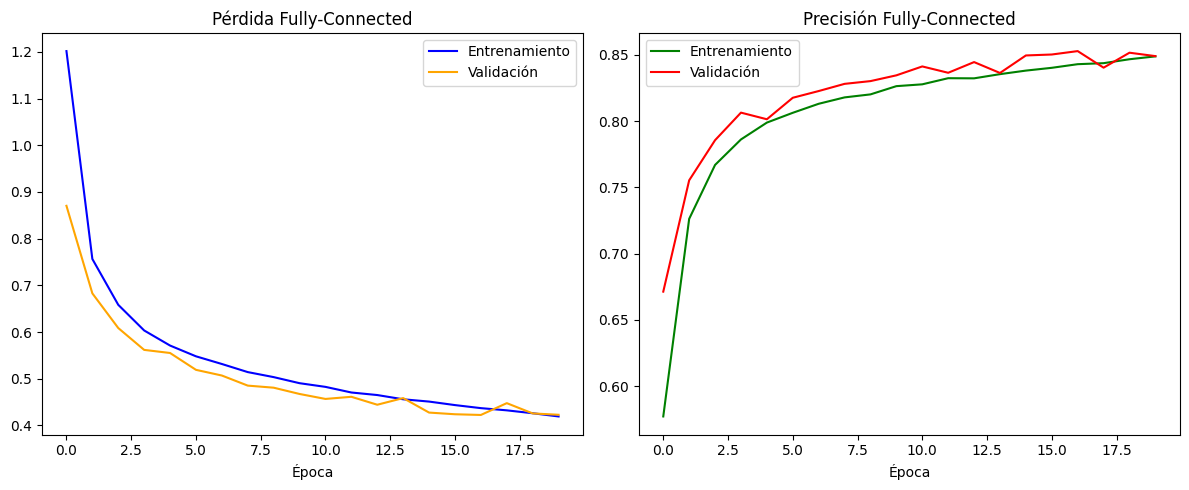

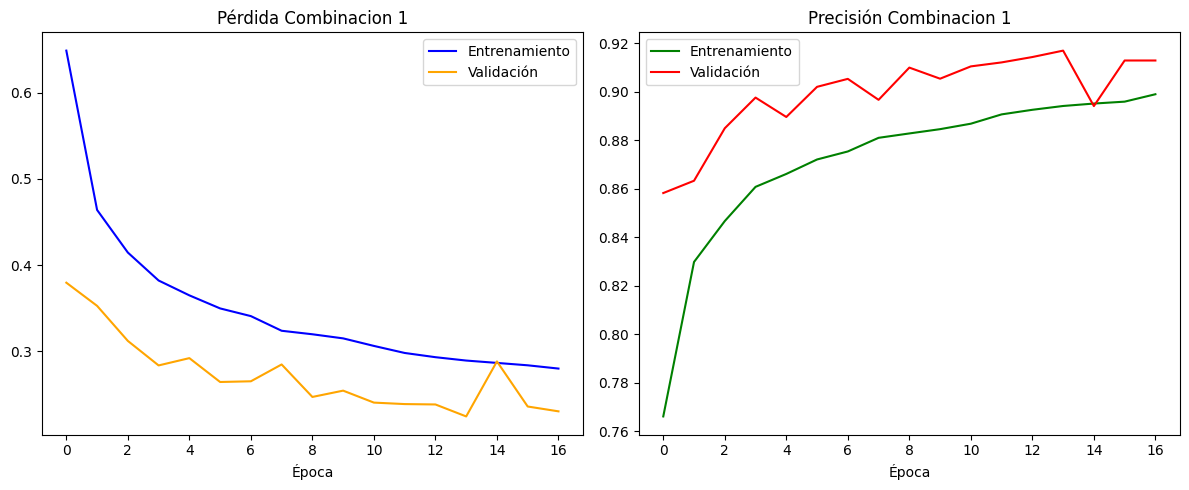

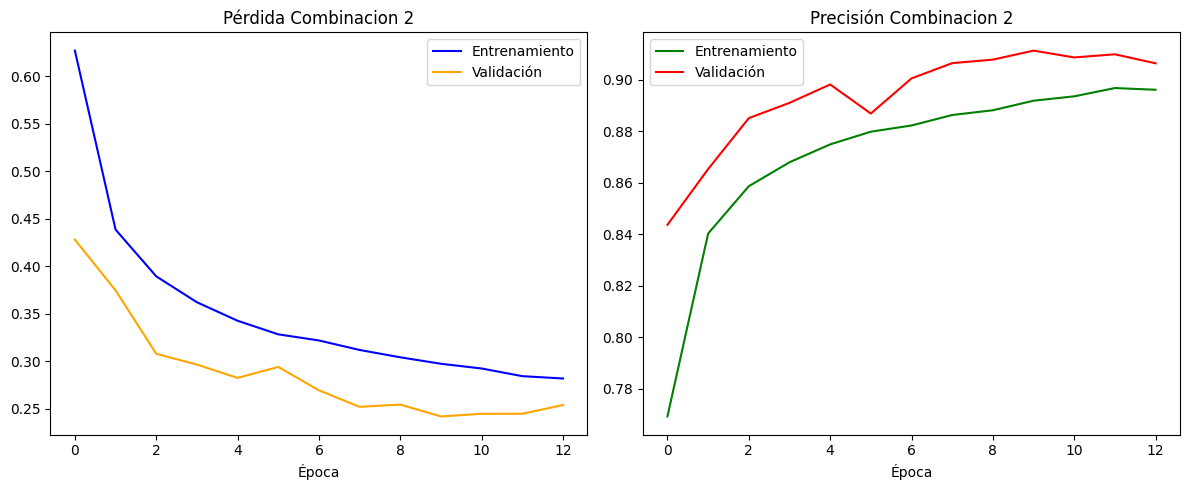

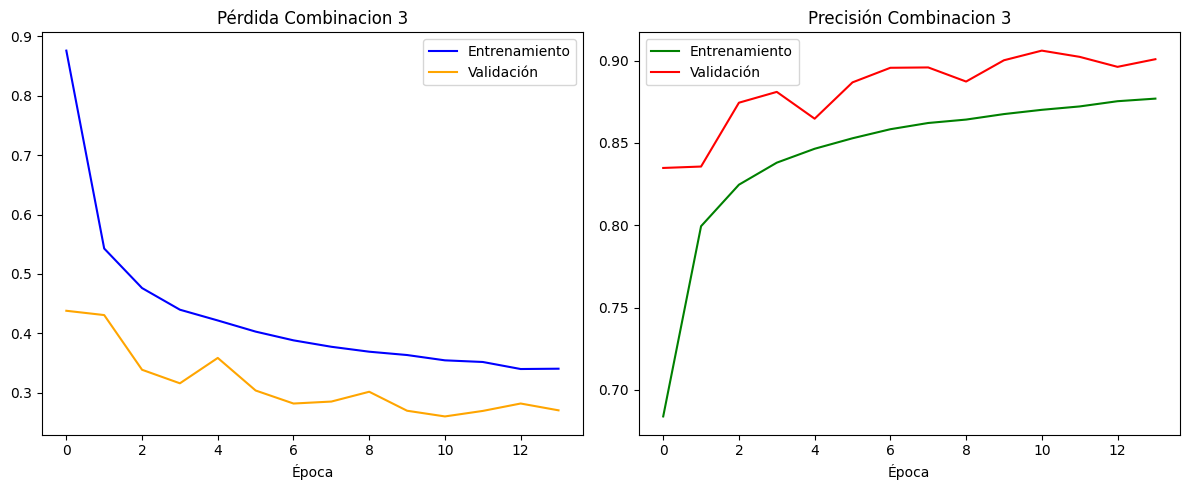

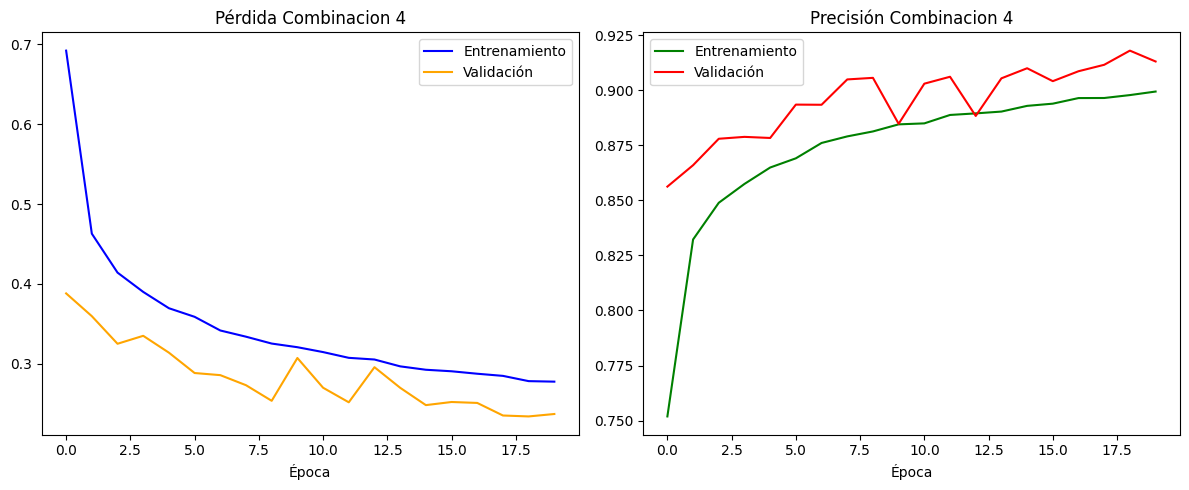

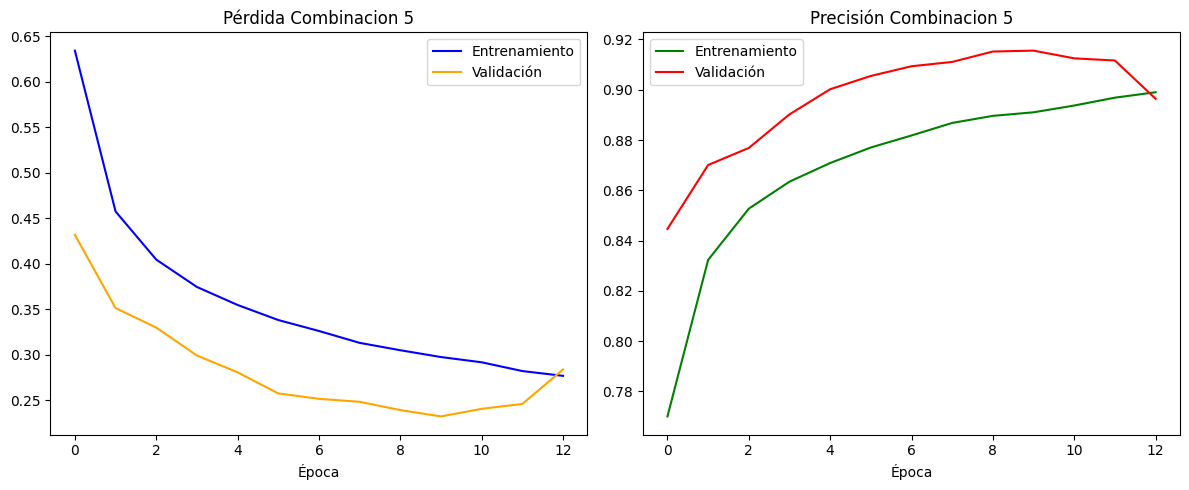

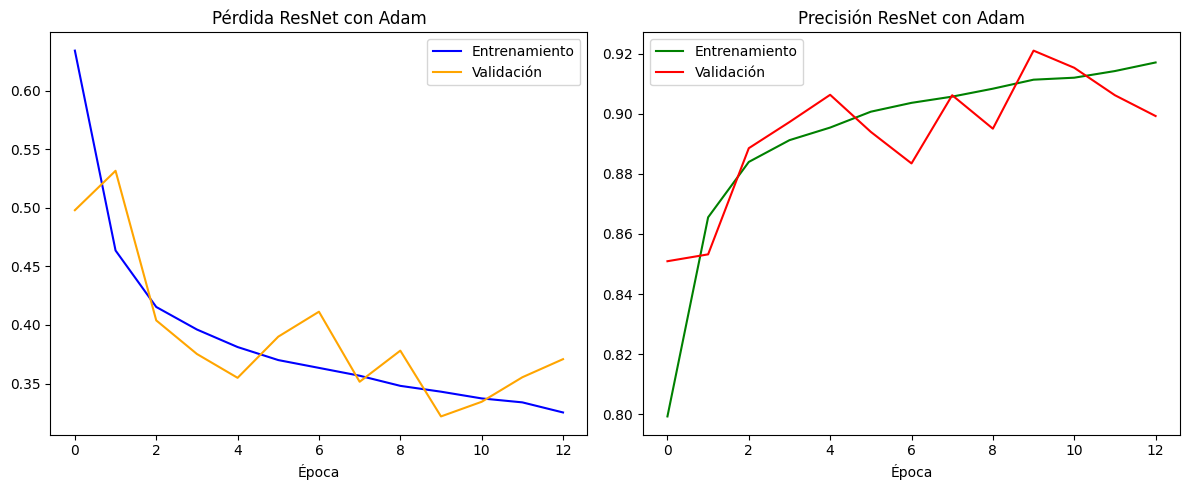

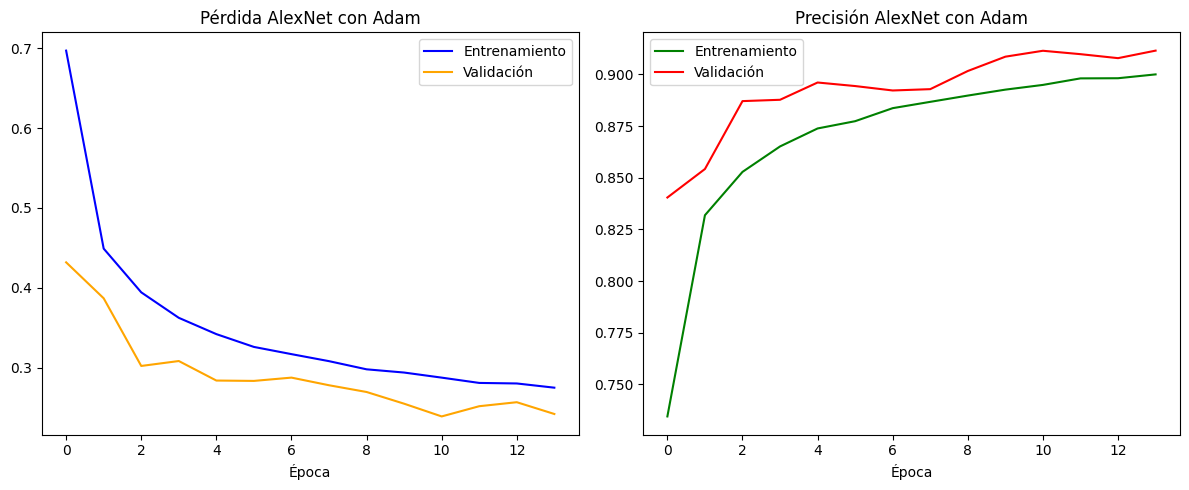

In [ ]:
# Graficar para cada modelo
plot_history(rsin, 'Fully-Connected')
plot_history(history_1, 'Combinacion 1')
plot_history(history_2, 'Combinacion 2')
plot_history(history_3, 'Combinacion 3')
plot_history(history_4, 'Combinacion 4')
plot_history(history_5, 'Combinacion 5')
plot_history(history_resnet, 'ResNet con Adam')
plot_history(history_alexnet, 'AlexNet con Adam')


Análisis de resultados

1.- ¿En qué influye añadir padding en el entrenamiento de la red y para qué sirve?. Expliquen en 5 líneas.
2.- Indica la cantidad de parámetros que generó la red MLP versus la CNN. ¿Por qué se produce la diferencia?
3.- ¿Cuál es el impacto de usar stride? ¿Qué valor usaron? ¿y por qué?
Respuestas

Añadir padding en una red neuronal convolucional (CNN) influye en el tamaño de las salidas de las capas convolucionales y ayuda a conservar información en los bordes de la imagen. Con padding, las dimensiones de la salida pueden mantenerse constantes, permitiendo una mejor alineación y preservación de las características espaciales a través de las capas. Esto es crucial para evitar la pérdida de información en los bordes y ayuda a la red a aprender características más detalladas de la imagen completa.

La cantidad de acierto que nos presento el modelo de MLP es de un 85% aproximadamente, pero con un 42% de perdida, y en su contraparte, la red convolucional nos entrego una precicion de casi el 92% y una perdida de 23%. Estas diferencias se deben principalmente a como trabaja una y otra, teniendo como principal diferencial el hecho de que la red convolucional al tener kernels puede optimizar el trabajo y de cierta forma trabajar de mejor manera con imagenes.

El impacto de usar stride es que a la hora de que la red neuronal "lea" la imagen esta puede ahorrarse tiempo, por lo que en redes muy complejas pueden ayudar a poder reducir gran cantidad de tiempo, en nuestro caso decidimos realizar kernels de 3x3 con stride de 1, ya que el data set que usamos utiliza imagenes de muy baja resolucion (25x25) y si usabamos un kernel mas grande y aumentabamos los stride se perderia mucha informacion.

Análisis de resultados

1.- Cuál fue el hiperparámetro, que consideren permitió alcanzar su mejor accuracy. Fundamenten su respuesta basados en la experimentación realizada.
2.-Expliquen la diferencia entre usar un stride y pooling para reducir el tamaño de los canales (mapa de características) en cada capa oculta.
3.-En caso de haber utilizado pooling, ¿qué técnica utilizaron?. Fundamenten la selección.
Respuestas

El o los hiperparametro que perimito alcanzer un mejor acurracy es tanto avarage pool como el tamaño del kernel, puesto que con avarage pool al tomar el promedio de informacion el kernel no pierde tanta informacion, y por su parte el tamaño de este tambien influye de manera importante ya que al ser imagenes con tan "pocos datos" se pierde mucha informacion importante si este aumenta su tamaño.

La principal diferencia entre usar un stride y un pooling es que stride afecrta al tamaño de la capa de salida y la cantidad de detalles que es capaz de capturar el modelo. Y por su contraparte pooling sirve como max o avarage pooling ya que si este es Max tomara el dato mas importante y por su parte avarage toma el promedio de el kernel y suaviza la salida.

Nosotros elegimos Avarage pooling ya que este funciona de mejor manera con el data set al tener imagenes tan pequeñas que reconoces funciona de mejor manera el suavizar que el tomar informacion predominante, ya que al tener tan pocos datos por imagen se perderia mucha informacion con Maxpooling

# **LSTM**